# ECG Signal Processing: Filtering, R-peak Detection, and Heart Rate Analysis

In [4]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

In [5]:
# Simulate ECG Signal
duration = 12  # seconds
sampling_rate = 500  # Hz
ecg = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate)
fs = sampling_rate  # Sampling rate

In [6]:
# Bandpass Filter Design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Apply Bandpass Filter
filtered_ecg = bandpass_filter(ecg, 0.5, 50, fs)

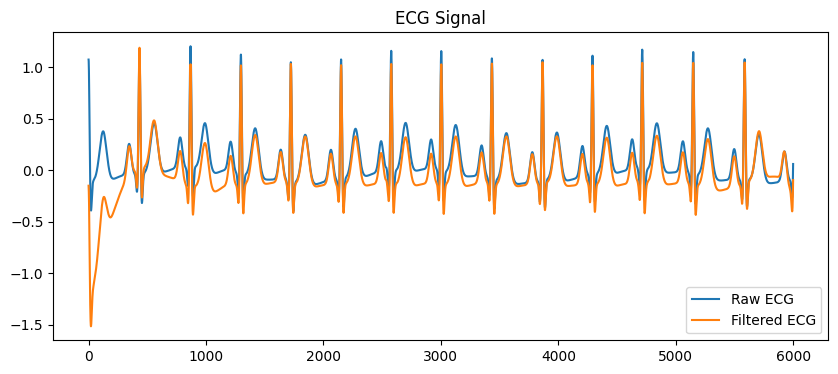

In [7]:
# Plot Raw and Filtered ECG
plt.figure(figsize=(10, 4))
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

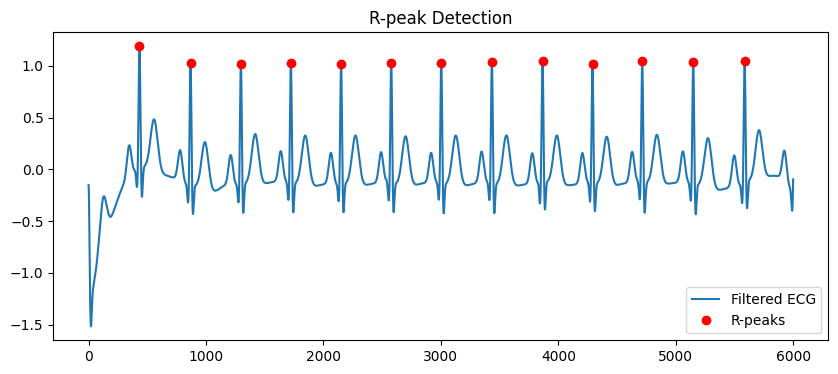

In [8]:
# R-peak Detection
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

# Plot R-peaks
plt.figure(figsize=(10, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

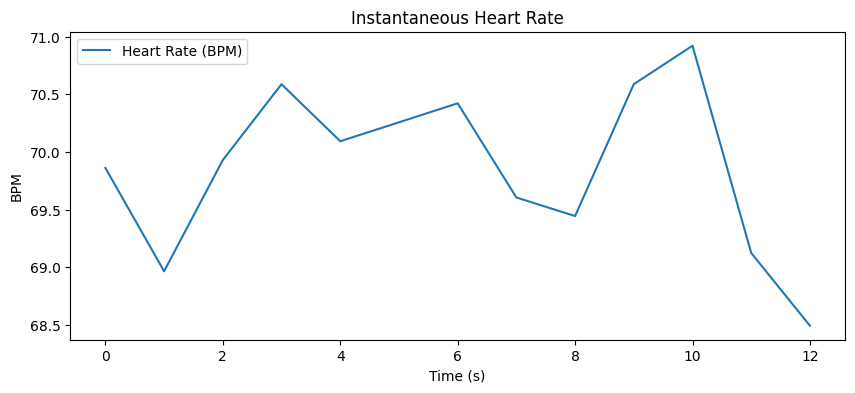

In [9]:
# Compute Instantaneous Heart Rate
heart_rate = nk.ecg_rate(r_peaks, sampling_rate=fs)

# Plot Heart Rate
plt.figure(figsize=(10, 4))
plt.plot(heart_rate, label="Heart Rate (BPM)")
plt.title("Instantaneous Heart Rate")
plt.xlabel("Time (s)")
plt.ylabel("BPM")
plt.legend()
plt.show()

### Comments on Filtering and R-peak Detection
Filtering significantly improves the accuracy of R-peak detection by removing noise and irrelevant frequency components. Without filtering, noise can lead to false positives or missed R-peaks, affecting heart rate computation.